In [1]:
# !pip install Ipython --upgrade
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
import sys
import time
import itertools

In [2]:
import yaml
from configs.config_loader import load_config
from utils.exact import data_config_update
from utils.plotting import Plotting, get_optimal_figsize, legend_without_duplicate_labels

# Standard PINN

#### Define configuration for simulation

In [3]:
# Initial condition
theta = 150*np.pi/180
y0 = [theta, theta, 0, 0] 

# Adapt config file
config_dict = { # Save results as json file
                'save_data': False,
  
                # Initial condition, computational domain
                'y0': y0,
                'x_domain': [0,5],

                # Random seeds
                'seed_pinn': 6,

                # Loss weighting scheme
                'alpha_IC': 0.99,

                # Training parameters
                'n_epochs': 2000,

              }

config = load_config(Path('', 'configs', 'default.yaml'),
                     config_update = config_dict,
                     verbose = True) 

from pinn.neural_net import PhysicsInformedNN

version : default
directory : 
seed_data : 0
seed_pinn : 6
save_data : False
x_domain : [0, 5]
x0 : 0
y0 : [2.6179938779914944, 2.6179938779914944, 0, 0]
l1 : 1
l2 : 1
m1 : 1
m2 : 1
g : 9.81
n_col : 1024
norm_flag : True
preprocessing_domain : [-5, 5]
n_hidden : 6
n_neurons : 30
activation : swish
n_epochs : 2000
learning_rate : 0.01
decay_rate : 0.9
n_pred_log : 10
freq_log : 10
freq_print : 500
keys_print : ['loss_train', 'loss_IC', 'loss_Fx1', 'loss_Fx2', 'loss_Fx3', 'loss_Fx4']
alpha_IC : 0.99


#### PINN training 

In [4]:
##############################################################################
# %% Start training the PINN
##############################################################################

# Create an instance of the PINN model
pinn = PhysicsInformedNN(config, verbose=False)

# # Train the model instance
pinn.train() 

# Return logs
log = pinn.callback.log

log_name not given
*** PINN build & initialized ***
Training started...
Feature scaling performed
Feature scaling performed
Feature scaling performed
Feature scaling performed
   0/2000 | loss_train: 3.42e+00 | loss_IC: 3.45e+00 | loss_Fx1: 0.00e+00 | loss_Fx2: 0.00e+00 | loss_Fx3: 2.89e-01 | loss_Fx4: 4.94e-01
 500/2000 | loss_train: 3.27e-02 | loss_IC: 5.16e-03 | loss_Fx1: 0.00e+00 | loss_Fx2: 0.00e+00 | loss_Fx3: 1.76e+00 | loss_Fx4: 9.96e-01
1000/2000 | loss_train: 5.18e-03 | loss_IC: 2.79e-03 | loss_Fx1: 0.00e+00 | loss_Fx2: 0.00e+00 | loss_Fx3: 1.57e-01 | loss_Fx4: 8.51e-02
1500/2000 | loss_train: 5.69e-03 | loss_IC: 2.93e-03 | loss_Fx1: 0.00e+00 | loss_Fx2: 0.00e+00 | loss_Fx3: 1.65e-01 | loss_Fx4: 1.14e-01
Feature scaling performed
Feature scaling performed
2000/2000
*** logs not saved (as specified) ***
Training finished!


#### Plot solution

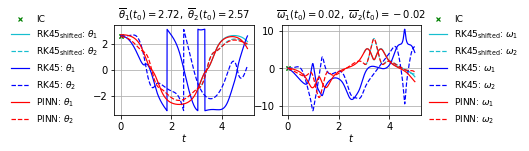

In [5]:
IC_pred = []
t_cont = 3

#####################################################################################

fig, axes = plt.subplots(1, 2, figsize=get_optimal_figsize(scale=1))
axes = axes.flatten()

for ax in axes:
    ax.set_xlabel(r'$t$', labelpad=0)
    ax.grid()

Plot = Plotting(log, alpha=1)
Plot.plotting_continuation(axes[0:],t_cont=t_cont)
Plot.plotting_yt_sol(axes[0:])
IC_pred.append(log['y_pred'][0])

IC_pred_mean = np.mean(np.array(IC_pred),axis=0)
IC_pred_mean[0:2]=IC_pred_mean[0:2]

axes[0].set_title(r'$\overline{{\theta}}_1(t_0)={:.2f},\ \overline{{\theta}}_2(t_0)={:.2f}$'.format(IC_pred_mean[0],IC_pred_mean[1]), fontsize=10)
axes[1].set_title(r'$\overline{{\omega}}_1(t_0)={:.2f},\ \overline{{\omega}}_2(t_0)={:.2f}$'.format(IC_pred_mean[2],IC_pred_mean[3]), fontsize=10)

legend_without_duplicate_labels(axes[0], (-0.8, 0.5), idx = [-1, 0, 1, 2, 3, 4, 5], loc='center left');
legend_without_duplicate_labels(axes[1], (1, 0.5), idx = [-1, 0, 1, 2, 3, 4, 5], loc='center left');

